In [ ]:
##########################
# 下面的代码用于准备运行环境
##########################

%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot

# matplotlib 对中文的支持及保存为 pdf 格式
from matplotlib import font_manager
cn_font = font_manager.FontProperties(fname='msyh.ttf', size=16)  # 网上支持中文

from matplotlib import rcParams
rcParams['font.family'] = 'Microsoft YaHei'  # 本地支持中文
rcParams['pdf.fonttype'] = 42

# Look pretty...
from matplotlib import style
style.use('ggplot')

# 二项分布


## 直观背景

我们进行 $n$ 次重复独立试验，每次试验的结果为 $A$ 或 $\bar{A}$，且 $P(A) = p$。

令 $X$ 表示 $A$ 出现的次数，则 $X = k$ (也就是 $A$ 出现 $k$ 次) 的概率为 ${n \choose k}(1-p)^{n-k}p^k$。

$X$ 的分布称为服从参数为 $n, p$ 的二项分布，记为 $b(n, p)$。

我们进行下列实验

- 随机生成一些服从二项的随机数，并观察其直方图
- 观察二项分布的分布列图形，感受图像形状和参数 n, p 的关系

在 python 中，多个包中都提供了处理随机变量的函数，这里我们用 `scipy.stats` 包中的 `binom` 对象生成一个二项分布随机变量。`binom` 对象是 `rv_discrete` 类的一个实例，它根据二项分布的定义实现了 `rv_discrete` 类中的抽象方法。

In [115]:
from scipy.stats import binom

def binomialRandoms(n, p, size):
    # 定义一个服从参数为 n, p 的二项分布的随机变量
    X = binom(n, p)
    
    print("随机生成 {} 个服从参数为 n={}, p={} 的二项分布的随机数：\n {}".format(size, n, p, X.rvs(size)))

In [117]:
binomialRandoms(5, 0.9, 30)

随机生成 30 个服从参数为 n=5, p=0.9 的二项分布的随机数：
 [5 4 5 4 5 5 4 5 4 5 5 4 5 5 4 5 5 4 4 5 4 5 5 4 5 3 4 5 3 4]


In [119]:
# 下面我们画一下二项分布随机数的直方图
from collections import Counter

def binomialBar(n, p, size):
    X = binom(n, p)
    
    # 统计频数
    frequency = Counter(X.rvs(size))
    x = []  # 所有可能的取值
    y = []  # 取各个值的频率
    for item in frequency.items():
        x.append(item[0])
        y.append(item[1]/size)
    
    fig = pyplot.figure(figsize=(6, 4))
    pyplot.bar(x, y)
    pyplot.title('二项分布随机数的直方图', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('频率', fontproperties=cn_font)
    pyplot.show()

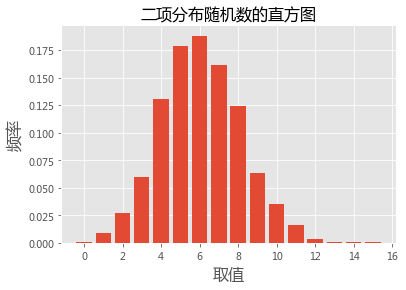

In [120]:
binomialBar(20, 0.3, 1000)

In [122]:
# 下面我们画二项分布的密度函数
def binomialPmf(n, p):
    X = binom(n, p)

    fig = pyplot.figure(figsize=(6, 4))
    x = range(n + 1)

    # 注意二项分布的密度函数可以写成 brv.pmf(x), 也可以写成 binom.pmf(x,n,p)
    pyplot.plot(x, X.pmf(x), 'bo', ms=8)
    pyplot.vlines(x, 0, X.pmf(x), colors='b', lw=5, alpha=0.5)

    # 画图范围
    pyplot.xlim(-1, n+1)
    pyplot.ylim(0, 0.4)

    pyplot.title('二项分布的分布列', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

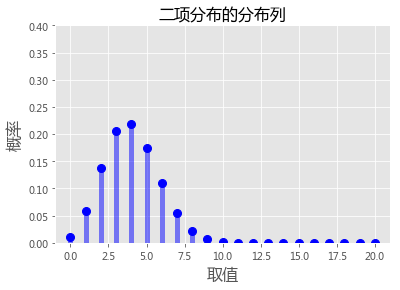

In [124]:
binomialPmf(20, 0.2)

下面我们考察 $X$ 的分布图像随参数 $p$ 的变化而变化的规律

In [126]:
# 在一张图中画多条密度曲线
def binomialPmfs(n, ps, colors):
    fig = pyplot.figure(figsize=(6, 4))    
    for p, c in zip(ps, colors):
        X = binom(n, p)
        x = range(n + 1)
        pyplot.plot(x, X.pmf(x), '.-', color=c, linewidth=0.5, label='$p=$'+str(p)) 
    
    # 画图范围   
    pyplot.legend(loc='best')
    pyplot.title('二项分布的分布列', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

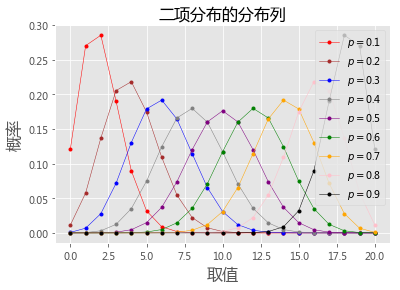

In [128]:
ps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = ['red', 'brown', 'blue', 'gray', 'purple', 'green', 'orange', 'pink', 'black']

binomialPmfs(20, ps, colors)

# 泊松分布

## 直观背景

若事件 $A$ 在单位时间内平均发生 $\lambda$ 次，令 $X$ 表示单位时间内 $A$ 发生的次数，则 $X = k$ (也就是 $A$ 发生 $k$ 次) 的概率为 $\frac{\lambda^k}{k!}e^{-\lambda}$。

$X$ 的分布称为服从参数 $\lambda$ 的泊松分布，记为 $\pi(\lambda)$。

我们进行下列实验

- 随机生成一些服从泊松分布的随机数，并观察其直方图
- 观察泊松分布的分布列图形，感受图像形状和参数 $\lambda$ 的关系

这里我们用 `scipy.stats` 包中的 `poisson` 对象生成一个泊松分布随机变量。

In [129]:
from scipy.stats import poisson

def poissonRandoms(lamb, size):
    # 定义一个服从参数为 n, p 的二项分布的随机变量
    X = poisson(lamb)
    
    print("随机生成 {} 个服从参数为 lamb={} 的泊松分布的随机数：\n {}".format(size, lamb, X.rvs(size)))

In [131]:
poissonRandoms(3, 30)

随机生成 30 个服从参数为 lamb=3 的泊松分布的随机数：
 [4 5 2 2 4 4 4 3 4 1 1 1 4 3 2 1 4 2 0 3 1 1 5 2 4 1 2 2 3 4]


In [133]:
# 下面我们画一下泊松分布随机数的直方图
from collections import Counter

def poissonBar(lamb, size):
    X = poisson(lamb)
    
    # 统计频数
    frequency = Counter(X.rvs(size))
    x = []  # 所有出现的取值
    y = []  # 取各个值的频率
    for item in frequency.items():
        x.append(item[0])
        y.append(item[1]/size)
    
    fig = pyplot.figure(figsize=(6, 4))
    pyplot.bar(x, y)
    pyplot.title('泊松分布随机数的直方图', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('频率', fontproperties=cn_font)
    pyplot.show()

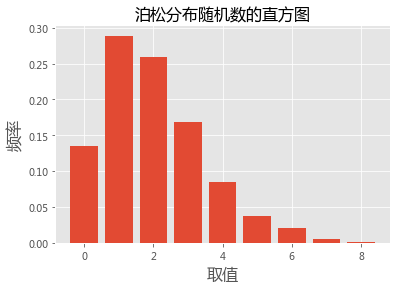

In [134]:
poissonBar(2, 1000)

In [135]:
# 下面我们画泊松分布的密度函数
def poissonPmf(lamb, x_max=10):
    X = poisson(lamb)

    fig = pyplot.figure(figsize=(6, 4))
    x = range(x_max)

    pyplot.plot(x, X.pmf(x), 'bo', ms=8)
    pyplot.vlines(x, 0, X.pmf(x), colors='b', lw=5, alpha=0.5)

    # 画图范围
    pyplot.xlim(-1, x_max+1)

    pyplot.title('泊松分布的分布列', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

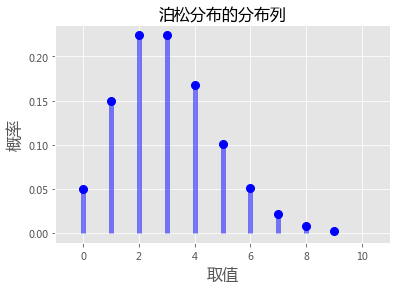

In [136]:
poissonPmf(3)

In [137]:
# 在一张图中画多条密度曲线
def poissonPmfs(lambs, colors, x_max=10):
    fig = pyplot.figure(figsize=(6, 4))
    x = range(x_max)
    
    for lamb, c in zip(lambs, colors):
        X = poisson(lamb)
        pyplot.plot(x, X.pmf(x), '.-', color=c, linewidth=0.5, label='$\lambda=$'+str(lamb)) 
    
    # 画图范围
    pyplot.xlim(-1, x_max+1)    
    pyplot.legend(loc='best')
    pyplot.title('泊松分布的分布列', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

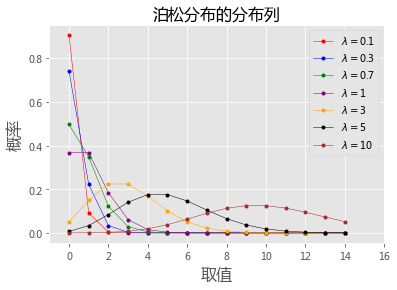

In [141]:
lambs = [0.1, 0.3, 0.7, 1, 3, 5, 10]
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'brown']

poissonPmfs(lambs, colors, x_max=15)

In [142]:
# 下面，我们比较一下二项分布和泊松分布
def possionApproxBinomial(n, p):
    X = binom(n, p)
    Y = poisson(n * p)

    fig = pyplot.figure(figsize=(6, 4))
    x = range(n+1)
    pyplot.plot(x, X.pmf(x), '.-', color='blue', linewidth=0.5, label='$(n,p)=$'+str((n,p)))
    pyplot.plot(x, Y.pmf(x), '*-', color='red', linewidth=0.5, label='$\lambda=$'+str(n*p)) 
    
    # 画图范围
    pyplot.xlim(-1, n+1)
    pyplot.legend(loc='best')
    pyplot.title('泊松分布近似二项分布', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

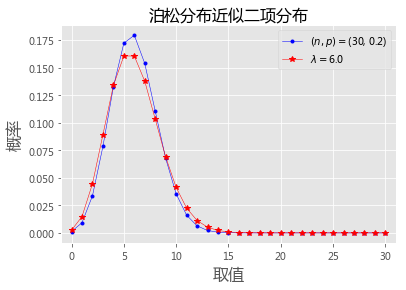

In [148]:
possionApproxBinomial(30, 0.2)

人们得到一个经验结论，当 $n$ 大于 30，$np$ 不超过 8 的时候，用泊松分布近似二项分布效果很好。

### 例 机票超售问题

200 座的客机，每个乘客有 5% 的可能性不来，问超售多少机票合理?

假设超售 m 张机票，则上面的问题可以用 200 重独立伯努利试验模型描述，设要求登机乘客数为 $X$，则 $X \sim {\rm Bin}(200+m, p)$。

方便起见，令 $Y$ 表示买票却未来的乘客数，则有 $X+Y=200+m$

有乘客上不了飞机的概率 $Pr(X > 200) = Pr(Y < m)$

下面，对超售的机票数 m 的每一个取值我们计算有乘客上不了机的概率

In [ ]:
from scipy.stats import binom   # 计算二项分布的函数

m_max = 10  # 超售机票的最大数量

seat_num = 200    # seat_num 表示飞机实有的座位数

p = 0.05   # 乘客不来的概率

# 定义计算超售 m 张机票的情况下有旅客上不了飞机的概率
def lack_seat_prob(seat_num, m, p) :
    binom.cdf( m, seat_num + m, p )

# 计算简便起见，用泊松分布近似二项分布，令 lambda=(200+m) * 0.05，则 200+m 个持票乘客中有 k 个不来的概率为 Pois(k,lambda)

# 下面，对 m 的每一个取值我们计算有乘客上不了机的概率

m <- seq(1, 50, 1)   # m 为超售的机票数向量
prob <- rep(0, length(m))   # prob 为对应于各个机票的概率向量, 初始化为 0
seat.num <- 200    # seat.num 表示飞机实有的座位数
p <- 0.05   # 乘客不来的概率

for(i in c(1:length(m))){
  # 计算 seat.num + m[i] 个持票旅客中有 k 个不来的概率 
  lambda <- (seat.num + m[i])*p
  
  k <- c(0:m[i]-1)
  kp <- rep(0, length(k))
  for(j in k){
    kp[j+1] <- round(PoisDist(j, lambda),5)
  }
  prob[i] <- sum(kp)
}

# 生成一个数据框用于存储结果
dist <- data.frame(Overbooks = m, Probability = prob)

# 显示结果
print(dist)

# 画图
plot(dist, main="超售概率分布图", xlab="超售的座位数", ylab="座位不够的概率")